# 练习2：Numpy100题

## 题目
62. Considering two arrays with shape (1,3) and (3,1), how to compute their sum using an iterator?

In [8]:
# 代码
import numpy as np

A = np.arange(3).reshape(3,1)
B = np.arange(3).reshape(1,3)
it = np.nditer([A,B,None])
for x,y,z in it: 
    z[...] = x + y
print(it.operands[2])

[[0 1 2]
 [1 2 3]
 [2 3 4]]


## 心得
Numpy是一个用于科学计算的扩展程序库，提供了许多高级的数值编程工具，包括：
* 1、一个强大的N维数组对象Array；
* 2、比较成熟的（广播）函数库；
* 3、用于整合C/C++和Fortran代码的工具包；
* 4、实用的线性代数、傅里叶变换和随机数生成函数。numpy和稀疏矩阵运算包scipy配合使用更加方便。

在我们使用这个库的时候，应该需要掌握一些基本的函数用法，熟练的使用他；对一些生僻的可以采用提示来运用。

# 练习3：Scipy与统计分析基础

## 题目
scipy一些函数的用法，感受scipy的作用

In [1]:
!pip install yfinance -i https://pypi.douban.com/simple/

Looking in indexes: https://pypi.douban.com/simple/
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=1b19fe4fe99ec2ab42aca81e8aa9d6f2d9e2bc648913c91c188e0dc72283e41b
  Stored in directory: c:\users\legion\appdata\local\pip\cache\wheels\19\aa\97\c119352828908dd3be195989ca703e1178c50cee1097f7aba6
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8368 sha256=befb2266c88bf9aa2c2f3f01a6c702e59ff5d5e13a9de56962b24a8d80b483bf
  Stored in directory: c:\users\legion\appdata\local\pip\cache\wheels\cb\ad\98\c36076486a4b2a3644bf1341bf496c37ec0e24f21ed9f43ab3
Successfully built yfinance multitasking


In [2]:
!pip install pandas_datareader

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np  
from scipy import stats  
from scipy.stats import norm  
import math

yf.pdr_override()
df = pdr.get_data_yahoo("TCEHY", start= '2021-03-20', end='2021-03-31')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-19,80.699997,82.639999,80.099998,82.639999,82.419487,2503300
2021-03-22,81.900002,82.849998,81.629997,82.769997,82.549133,1853100
2021-03-23,81.650002,81.940002,80.910004,80.930000,80.714050,1861000
2021-03-24,80.930000,81.160004,76.599998,76.809998,76.605042,5983900
2021-03-25,77.309998,78.190002,76.800003,77.419998,77.213409,4747400


In [2]:
market = 'TCEHY'
symbol = 'BABA'
new_df = pd.DataFrame(
          {symbol : df['Adj Close'], 
           market : df['Adj Close']}, 
          index=df.index)
# 计算回报率
new_df[['stock_returns',
        'market_returns']] = new_df[[symbol,market]] / new_df[[symbol,market]].shift(1) -1
new_df = new_df.dropna()
# np.cov()对给定的数据和权重，估计协方差矩阵
# 协方差用于衡量两个变量的总体误差
covmat = np.cov(new_df["stock_returns"],
                new_df["market_returns"])
# 计算
beta = covmat[0,1]/covmat[1,1]
alpha= np.mean(new_df["stock_returns"]
              )-beta*np.mean(new_df["market_returns"])

In [5]:
print('Alpha:', alpha)
print('Beta:', beta)
print(covmat)

Alpha: 0.0
Beta: 1.0
[[0.00096505 0.00096505]
 [0.00096505 0.00096505]]


In [10]:
close = df['Adj Close']
np.median(close)

79.66685104370117

In [11]:
np.var(close)

4.510481817502296

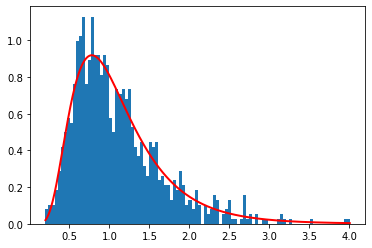

In [16]:
# 是指一个随机变量的对数服从正态分布，则该随机变量服从对数正态分布。对数正态分布从短期来看，与正态分布非常接近。对数正态分布的概率密度函数
from scipy.stats import lognorm
import matplotlib.pyplot as plt
# 均值
mu = df['Returns'].mean() 
#幅度
sigma = df['Returns'].std()*math.sqrt(252) 
s = np.random.lognormal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 100, density=True, align='mid')

x = np.linspace(min(bins), max(bins), 10000)
pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2)) / (x * sigma * np.sqrt(2 * np.pi)))
# pdf=lognorm.pdf(x, s, loc=0, scale=1)
plt.plot(x, pdf, linewidth=2, color='r')

## 心得
Scipy是一个用于数学、科学、工程领域的常用软件包，可以处理插值、积分、优化、图像处理、常微分方程数值解的求解、信号处理等问题。它用于有效计算Numpy矩阵，使Numpy和Scipy协同工作，高效解决问题。与numpy相比，scipy提供了更丰富的功能，在统计，优化，数值积分等领域提供了大量的函数，供基础科学研究使用。
scipy对我们研究数据起到了关键作用，他很好的帮助我们得到数据的质量情况，对结论分析有着很重要的作用。我们需要学好一些统计原理，这样才有助于我们选取scipy的函数。

# 练习4：Pandas训练50题

## 题目
2.9 计算3位滑动窗口的平均值，忽略NAN

In [17]:
#代码
df = pd.DataFrame({
    'group': list('aabbabbbabab'),
    'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]
})
print(df)

g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value']

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
s.reset_index(level=0, drop=True).sort_index()

   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## 心得
pandas是一款基于NumPy的数据分析工具，尽管只有在很了解Matplotlib的api基础上才可以绘图，但是如果只想更好、更快的处理结构化数据，pandas绝对是最棒的工具。pandas里的许多方法需要我们提前知道，这样才有利于我们分析数据。